In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import sqrt

In [158]:
def exp(tau):
    return -tau*np.log(1-np.random.uniform())

In [159]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

In [160]:
def max(sample):
    m=sample[0]
    for i in sample:
        if i > m: m = i
    return m

def min(sample):
    m=sample[0]
    for i in sample:
        if i < m: m = i
    return m

In [161]:
def max2(sample,func,t):

    m = func(sample,t[0])
    index = t[0]
    
    for i in t:

        t1 = func(sample,i)

        if t1 > m:
            m = t1
            index = i

    return m,index

In [162]:
def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # Into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

Plotting the exponentially distributed data

(array([618., 236., 103.,  21.,  13.,   7.,   1.,   0.,   0.,   1.]),
 array([3.32505803e-03, 5.11184794e+00, 1.02203708e+01, 1.53288937e+01,
        2.04374166e+01, 2.55459395e+01, 3.06544624e+01, 3.57629853e+01,
        4.08715081e+01, 4.59800310e+01, 5.10885539e+01]),
 <BarContainer object of 10 artists>)

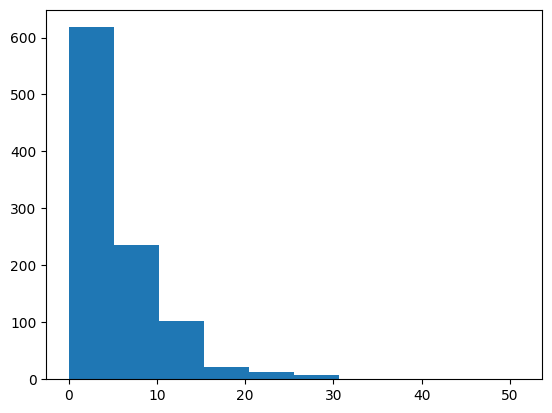

In [163]:
N = 1000
t0 = 5

dati = pdf(N,t0)


plt.hist(dati,bins=10)

Comparing likelihoods with different data sizes

In [164]:
def likelihood(dati,t):
    return np.prod([np.exp(-i/t)/t for i in dati])

In [165]:
def loglikelihood(dati,t):
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

In [166]:
t_range = np.linspace(1,100,1000) #range of t0 values

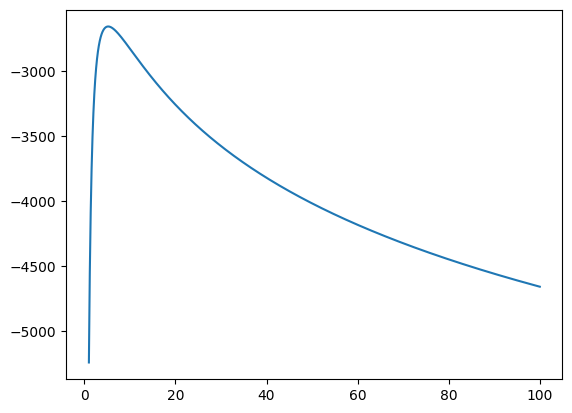

In [167]:
logLike = [loglikelihood(dati,t) for t in t_range]

plt.plot(t_range,logLike)

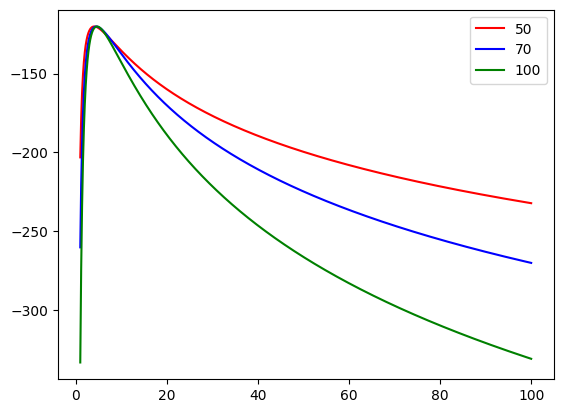

In [168]:
like1 = [loglikelihood(dati[:50],t) for t in t_range]
like2 = [loglikelihood(dati[:70],t) for t in t_range]
like3 = [loglikelihood(dati[:100],t) for t in t_range]

m1 = max(like1)
m2 = m1-max(like2)
m3 = m1-max(like3)

like2 = [i+m2 for i in like2]
like3 = [i+m3 for i in like3]

plt.plot(t_range,like1,c='red',label=50)
plt.plot(t_range,like2,c='blue',label=70)
plt.plot(t_range,like3,c='green',label=100)
plt.legend()

In [169]:
def zer(dati, range, prec = .0001):
    
    m = min(range)
    M = max(range)
    
    mid = (M-m)/2

    while(abs(M-m) > prec):

        mid = (M-m)/2
        print(mid)
        
        if(loglikelihood(dati,mid)*loglikelihood(dati,m) < 0): 
            
            m = mid

        else: 
            M = mid

    return mid

In [170]:
def zeros(dati,a,b,prec=.001):
    
    y_max,x_max = max2(dati,loglikelihood,t_range)
    
    a = a
    b = b

    while(abs(b-a) > prec):

        m = ((b-a)/2)+a

        fa = (loglikelihood(dati,a)-y_max+0.5)
        fb = (loglikelihood(dati,m)-y_max+0.5)

        if  fa*fb > 0:
            a = m
        else:
            b = m
        
    return m

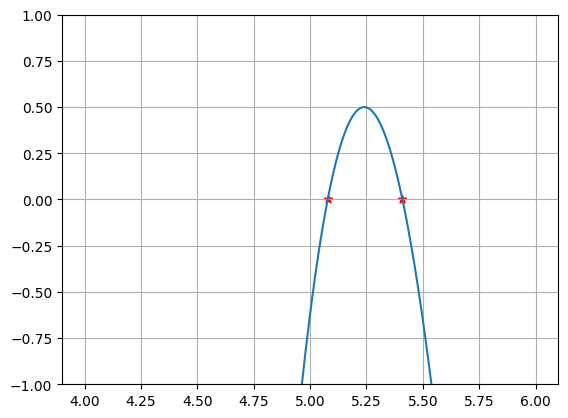

In [171]:
a,b = 4,6
t_range = np.linspace(a,b,1000) #range of t0 values

y_max,x_max = max2(dati,loglikelihood,t_range)

l = [loglikelihood(dati,t)-y_max+0.5 for t in t_range]

z = z1,z2 = zeros(dati,a,x_max),zeros(dati,x_max,b)

plt.plot(t_range,l)
plt.scatter(z,(0,0),marker = '*',c='red')
plt.scatter(x_max,y_max,marker = '*',c='red')


plt.ylim(-1,1)
plt.grid(True)